#### Template Matching Demo

Most parts of the tutorial is based on (https://https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/template_matching/template_matching.html#which-are-the-matching-methods-available-in-opencv)

For reference to what different methods do to match the correct image refer to https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/template_matching/template_matching.html#which-are-the-matching-methods-available-in-opencv

#### Template Matching is a method for searching and finding the location of a template image in a larger image. OpenCV comes with a function cv.matchTemplate() for this purpose. It simply slides the template image over the input image (as in 2D convolution) and compares the template and patch of input image under the template image.


- Read the Template.png and MainImage.png. 
- Write a template matching function which plots box in the MainImage where the template matches the best.
- You can reference OpenCV 'cv.matchTemplate()' example (link) to get knowledge of the APIs available. Visualize your Template Match Location for matching algorithm 'TM_CCORR' and 'TM_CCORR_NORMED'

In [1]:
import cv2
import matplotlib.pyplot as plt

In [29]:
def result(method, row, main, template, method_name):
    temp = cv2.imread('MainImage.png', 0)
    w, h = template.shape[::-1]
    res = cv2.matchTemplate(main, template, method)
    print("Shape of result is {}".format(res.shape))
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = max_loc
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(temp, top_left, bottom_right, 255, 2)
    
    plt.subplot(9,2,row*2-1),plt.imshow(res, cmap = 'gray')
    plt.title("Matching Result " + method_name), plt.xticks([]), plt.yticks([])
    plt.subplot(9,2,row*2),plt.imshow(temp, cmap = 'gray')
    plt.title("Detected Point " + method_name), plt.xticks([]), plt.yticks([])

Image Shape  (231, 308)
Template shape (84, 62)
Shape of result is (148, 247)
Shape of result is (148, 247)
Shape of result is (148, 247)
Shape of result is (148, 247)
Shape of result is (148, 247)
Shape of result is (148, 247)


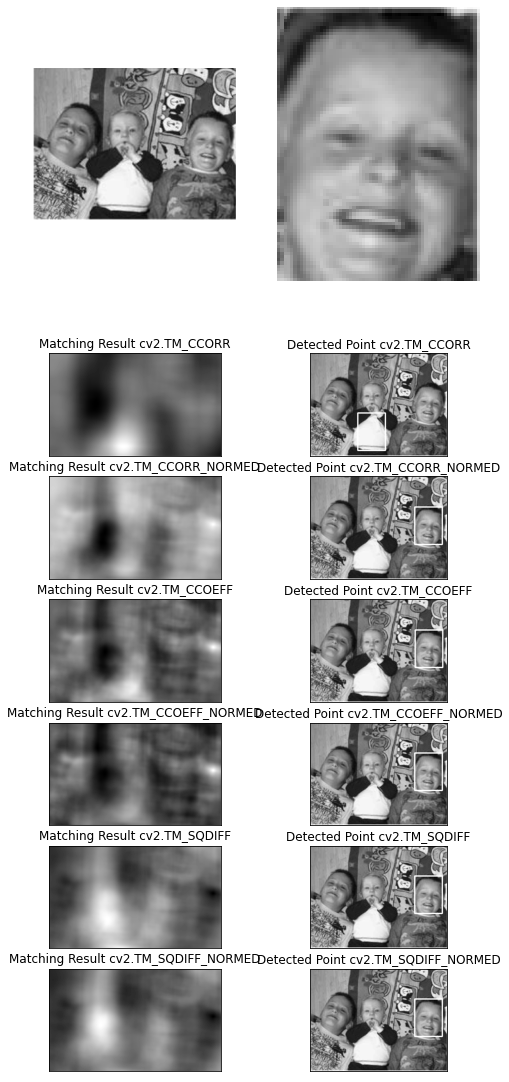

In [30]:
### TODO
main = cv2.imread('MainImage.png', 0)

template = cv2.imread('Template.png', 0)

plt.figure(figsize=(8,20))

print("Image Shape ", main.shape)
print("Template shape", template.shape)

plt.subplot(3, 2, 1), plt.imshow(main, cmap='gray'), plt.axis("off")
plt.subplot(3, 2, 2), plt.imshow(template, cmap='gray'), plt.axis("off")

result(cv2.TM_CCORR, 4, main, template, 'cv2.TM_CCORR')
result(cv2.TM_CCORR_NORMED, 5, main, template, 'cv2.TM_CCORR_NORMED')
result(cv2.TM_CCOEFF, 6, main, template, 'cv2.TM_CCOEFF')
result(cv2.TM_CCOEFF_NORMED, 7, main, template, 'cv2.TM_CCOEFF_NORMED')
result(cv2.TM_SQDIFF, 8, main, template, 'cv2.TM_SQDIFF')
result(cv2.TM_SQDIFF_NORMED, 9, main, template, 'cv2.TM_SQDIFF_NORMED')


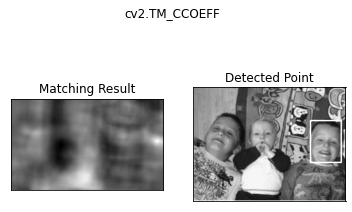

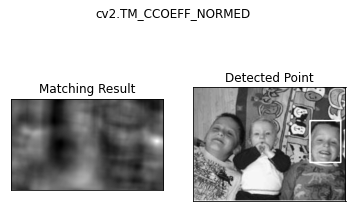

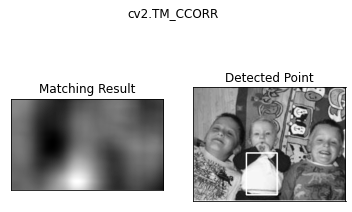

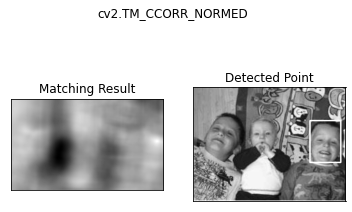

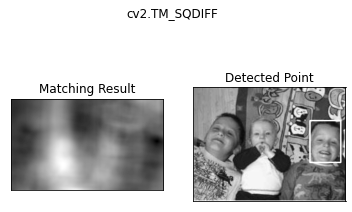

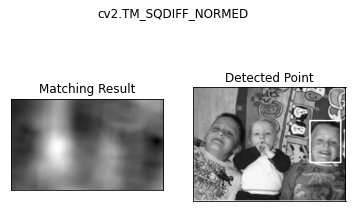

In [19]:
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
w, h = template.shape[::-1]

for meth in methods:
    img = main.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()